In [1]:
library(tidyverse)

library(grid)
library(gridExtra)
library(patchwork)

source("/home/yuliya/repos/other/removeBatch/evaluation_utils/plots_eda.R")
source("/home/yuliya/repos/other/removeBatch/evaluation_utils/evaluation_funcs.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: viridisLite

Loading required package: limma

Loading required package: BiocParallel


Attaching package: ‘variancePartition’


The following object is masked from ‘package:limma’:

    topTable




In [2]:
cbPalette <- c("#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00")

# Load data

central_corrected === fedRBE corrected data

In [3]:
data_path <- "../evaluation_data/proteomics/"

central_uncorrected <- read.csv(paste0(data_path, "before/central_intensities_log_UNION.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
metadata <- read.csv(paste0(data_path, "before/initial_data/central_batch_info.tsv"), sep = "\t", header = TRUE, row.names = 1)

central_corrected <- read.csv(paste0(data_path, "after/intensities_log_Rcorrected_UNION.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)
fed_corrected <- read.csv(paste0(data_path, "after/FedApp_corrected_data.tsv"), sep = "\t", header = TRUE, row.names = 1, check.names = F)

# remove X from row names
# rownames(metadata) <- gsub("X", "", rownames(metadata))
metadata$file <- rownames(metadata)
# order the columns in intensity dataframes
central_corrected <- central_corrected[, rownames(metadata)]

central_uncorrected <- central_uncorrected[rownames(central_corrected), rownames(metadata)]
fed_corrected <- fed_corrected[rownames(central_corrected), rownames(metadata)]

cat("Loaded data\n")
cat("Central uncorrected:", nrow(central_uncorrected), "rows\n")
cat("Central corrected:", nrow(central_corrected), "rows\n")
cat("Fed corrected:", nrow(fed_corrected), "rows\n")
cat("Sample metadata:", nrow(metadata), "rows\n\n")

Loaded data
Central uncorrected: 3034 rows
Central corrected: 3034 rows
Fed corrected: 3034 rows
Sample metadata: 118 rows



# Checks

## Diagnostic plots

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


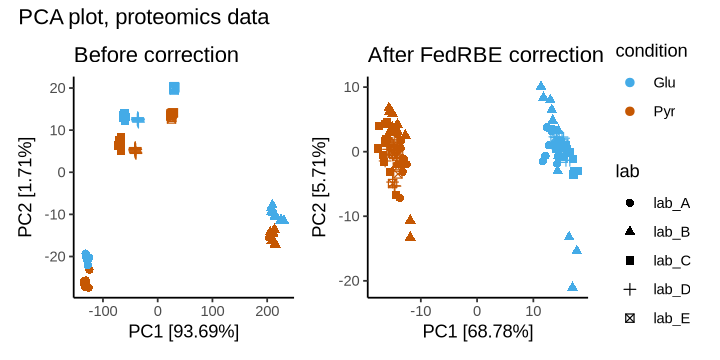

In [4]:
pca_plot_uncorrected <- pca_plot(central_uncorrected, metadata, 
    title = paste("Before correction"),
    quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=F, cbPalette=c("#44abe7", "#c55702"))
pca_plot_fed <- pca_plot(fed_corrected, metadata, 
    title = paste("After FedRBE correction"),
        quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=T, cbPalette=c("#44abe7", "#c55702"))

layout <- (pca_plot_uncorrected + pca_plot_fed)
layout <- layout + plot_annotation("PCA plot, proteomics data")
options(repr.plot.width=6, repr.plot.height=3)
layout

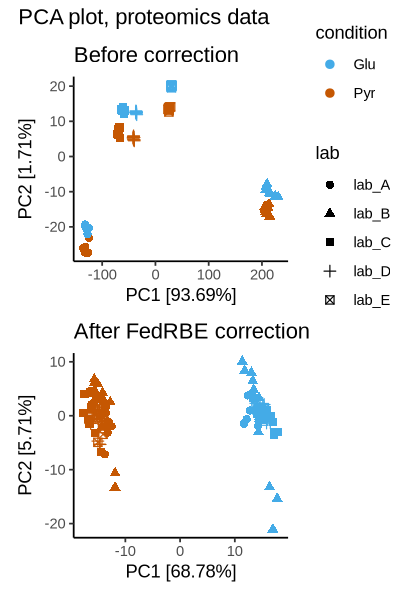

In [5]:
pca_plot_uncorrected <- pca_plot(central_uncorrected, metadata, 
    title = paste("Before correction"),
    quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=T, cbPalette=c("#44abe7", "#c55702"))
pca_plot_fed <- pca_plot(fed_corrected, metadata, 
    title = paste("After FedRBE correction"),
        quantitative_col_name = "file", col_col = "condition", shape_col="lab", show_legend=F, cbPalette=c("#44abe7", "#c55702"))


layout <- pca_plot_uncorrected / 
          pca_plot_fed
layout <- layout + plot_annotation("PCA plot, proteomics data")
options(repr.plot.width=3.5, repr.plot.height=5)
layout

Warning message:
“Removed 48697 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 48697 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 48697 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 49834 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 49834 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 49834 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_violin()`).”


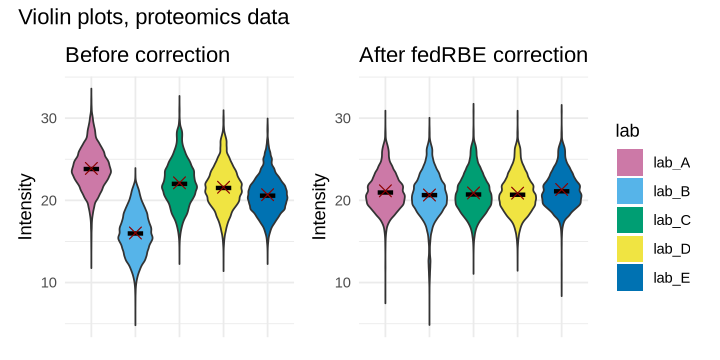

In [6]:
# # Determine the shared Y-axis limits
y_min <- min(central_uncorrected, fed_corrected, na.rm = TRUE)
y_max <- max(central_uncorrected, fed_corrected, na.rm = TRUE)
y_limits <- c(y_min, y_max)

boxplots_uncorrected <- boxplot_plot_groupped(central_uncorrected, metadata, 
    title = paste("Before correction"),
    quantitativeColumnName = "file",
    color_col = "lab", remove_xnames = T, show_legend=F, y_limits = y_limits, cbPalette = cbPalette)
    
boxplots_fed <- boxplot_plot_groupped(fed_corrected, metadata, 
    title = paste("After fedRBE correction"),
    quantitativeColumnName = "file",
    color_col = "lab", remove_xnames = T, y_limits = y_limits, cbPalette = cbPalette)


layout <- (boxplots_uncorrected + boxplots_fed) 
layout <- layout + plot_annotation("Violin plots, proteomics data")
options(repr.plot.width=6, repr.plot.height=3)
layout

Warning message:
“Removed 48697 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 48697 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 48697 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 49834 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 49834 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 49834 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_violin()`).”


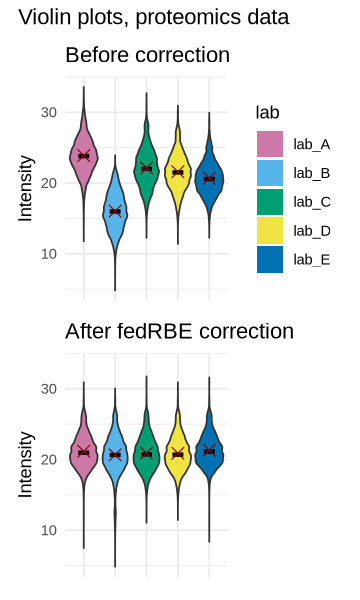

In [7]:
# # Determine the shared Y-axis limits
y_min <- min(central_uncorrected, fed_corrected, na.rm = TRUE)
y_max <- max(central_uncorrected, fed_corrected, na.rm = TRUE)
y_limits <- c(y_min, y_max)

boxplots_uncorrected <- boxplot_plot_groupped(central_uncorrected, metadata, 
    title = paste("Before correction"),
    quantitativeColumnName = "file",
    color_col = "lab", remove_xnames = T, show_legend=T, y_limits = y_limits, cbPalette = cbPalette)
    
boxplots_fed <- boxplot_plot_groupped(fed_corrected, metadata, 
    title = paste("After fedRBE correction"),
    quantitativeColumnName = "file",
    color_col = "lab", remove_xnames = T, y_limits = y_limits, show_legend=F, cbPalette = cbPalette)



layout <- boxplots_uncorrected /
          boxplots_fed
layout <- layout + plot_annotation("Violin plots, proteomics data")
options(repr.plot.width=3, repr.plot.height=5)
layout

##  Linear model per variable

Following batch effect correction, the percentage of variance explained by the condition should be greater than the batch.

In [8]:
library(variancePartition)

In [9]:
form <- ~ condition + lab

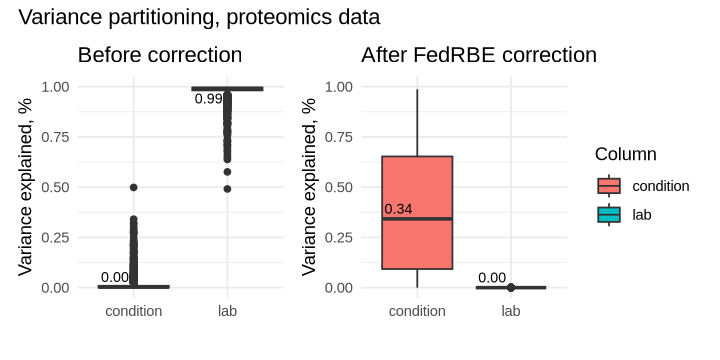

In [10]:
lmpv_plot_fed <- lmpv_plot(fed_corrected, metadata, 
    title = paste("After FedRBE correction"), form = form)
lmpv_plot_uncorrected <- lmpv_plot(central_uncorrected, metadata, 
    title = paste("Before correction"), show_legend=F, form = form)
    

layout <- (lmpv_plot_uncorrected + lmpv_plot_fed) 
layout <- layout + plot_annotation("Variance partitioning, proteomics data")
options(repr.plot.width=6, repr.plot.height=3)
layout

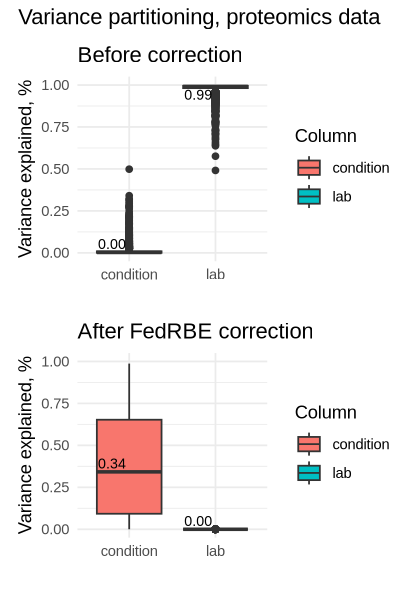

In [11]:
lmpv_plots_corrected <- lmpv_plot(fed_corrected, metadata, 
    title = paste("After FedRBE correction"), show_legend=F, form = form)
lmpv_plot_uncorrected <- lmpv_plot(central_uncorrected, metadata, 
    title = paste("Before correction"), show_legend=T, form = form)
    

layout <- lmpv_plot_uncorrected /
          lmpv_plot_fed
layout <- layout + plot_annotation("Variance partitioning, proteomics data")
options(repr.plot.width=3.5, repr.plot.height=5)
layout

# Errors

In [17]:
# calculate differences between central and fedRBE corrected data
# print it as a table
differences <- calculated_differences(central_corrected, fed_corrected)
cat("Min difference:", differences[2], "\n")
cat("Mean difference:", differences[3], "\n")
cat("Max difference:", differences[1], "\n")

Min difference: 0 
Mean difference: 3.157309e-14 
Max difference: 2.131628e-13 


In [18]:
# Combine the data frames into a single data frame for easy plotting
data <- data.frame(
  Expression = as.vector(rowMeans(central_corrected, na.rm = TRUE)),    # calculate the mean expression for each row
  Error = as.vector(rowMeans(abs(central_corrected - fed_corrected), na.rm = TRUE)),    # calculate the mean absolute difference between the two data sets
  MaxError = as.vector(apply(abs(central_corrected - fed_corrected), 1, max, na.rm = TRUE))    # calculate the maximum absolute difference between the two data sets
)

`geom_smooth()` using formula = 'y ~ x'


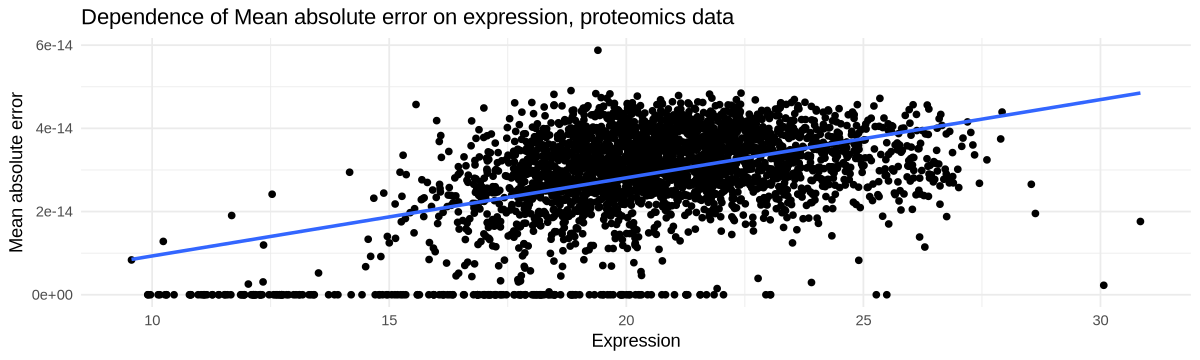

In [19]:
options(repr.plot.width=10, repr.plot.height=3)
# Plot the data
ggplot(na.omit(data), aes(x = Expression, y = Error)) +
  geom_point() +  # Scatter plot of Expression vs. Error
  geom_smooth(method = "lm", se = FALSE) +  # Add a trend line (optional)
  labs(title = "Dependence of Mean absolute error on expression, proteomics data",
       x = "Expression",
       y = "Mean absolute error") +
  # add y limits from 5e-14 to 5e-15
  #   scale_y_continuous(limits = c(5e-16,5e-13)) +
  theme_minimal() 
  


No id variables; using all as measure variables

No id variables; using all as measure variables



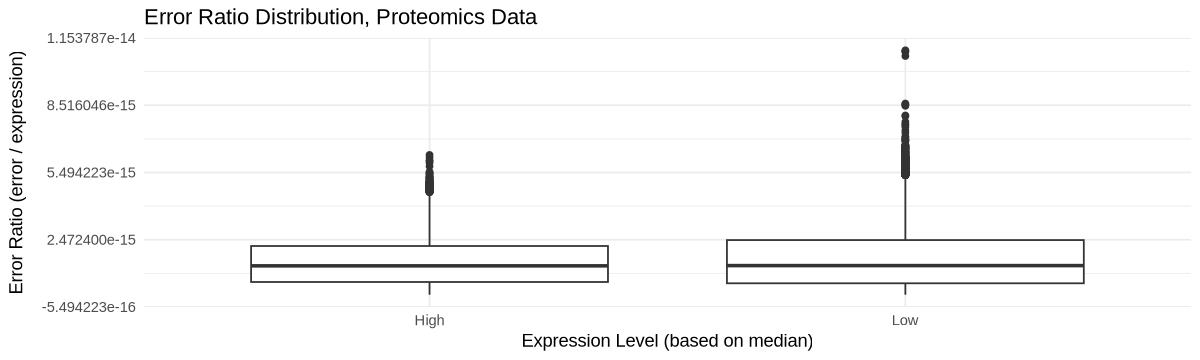

In [20]:
library(reshape2)

# Calculate ratio expression errors (assuming both data frames are of the same dimensions)
ratio_expr_errors <- abs(central_corrected - fed_corrected) / central_corrected

# Calculate the median expression value across the entire central_corrected dataframe
median_expression <- median(as.matrix(central_corrected), na.rm = TRUE)

# Melt the data frames to convert them to long format
ratio_expr_errors_long <- melt(ratio_expr_errors, varnames = c("Row", "Column"), value.name = "ErrorRatio")
central_corrected_long <- melt(central_corrected, varnames = c("Row", "Column"), value.name = "ExpressionValue")

# Combine the melted data frames
combined_data <- ratio_expr_errors_long
combined_data$ExpressionValue <- central_corrected_long$ExpressionValue
combined_data <- na.omit(combined_data)

# Add a column to determine if each value is 'Low' or 'High' based on the median expression value
combined_data$ExpressionLevel <- ifelse(combined_data$ExpressionValue < median_expression, "Low", "High")

# Plot as two boxplots
ggplot(combined_data, aes(x = ExpressionLevel, y = ErrorRatio)) +
  geom_boxplot() +
  labs(
    title = "Error Ratio Distribution, Proteomics Data",
    x = "Expression Level (based on median)",
    y = "Error Ratio (error / expression)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    axis.ticks.x = element_blank()
  )

# Session info

In [21]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 24.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/yuliya/miniforge3/envs/fedRBE/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] reshape2_1.4.4           variancePartition_1.32.2 BiocParallel_1.36.0     
 [4] limma_3.58.1             viridis_0.6.5            viridisLite_0.4.2       
 [7] ggsci_3.2.0              umap_0.2.10.0       